<br><font face = "Verdana" size = "2"> <b>Name :- Kundan Patil  DS0522
<br>email id:-patilkundan.1718@gmail.com

<br><font face = "Verdana" size = "2">Loan Application Status Prediction
<br><font face = "Verdana" size = "2">Problem Statement:
<br><font face = "Verdana" size = "2">This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

<br><font face = "Verdana" size = "2">Independent Variables:
<font face = "Verdana" size = "2">
<br><font face = "Verdana" size = "2">Loan_ID
<br><font face = "Verdana" size = "2">Gender
<br><font face = "Verdana" size = "2">Married
<br><font face = "Verdana" size = "2">Dependents
<br><font face = "Verdana" size = "2">Education
<br><font face = "Verdana" size = "2">Self_Employed
<br><font face = "Verdana" size = "2">ApplicantIncome
<br><font face = "Verdana" size = "2">CoapplicantIncome
<br><font face = "Verdana" size = "2">Loan_Amount
<br><font face = "Verdana" size = "2">Loan_Amount_Term
<br><font face = "Verdana" size = "2">Credit History
<br><font face = "Verdana" size = "2">Property_Area
<br><font face = "Verdana" size = "2">Dependent Variable (Target Variable):
<br><font face = "Verdana" size = "2"> Loan_Status
<br><font face = "Verdana" size = "2">You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 
<br><font face = "Verdana" size = "2">Note: The link of the dataset is below. 
<br><font face = "Verdana" size = "2">Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
# Importing Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')


In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
#checking shape of dataset
df.shape

(614, 13)

In [6]:
#column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#checking datatype
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Yes ! there are  null present  in our dataset so 1st  we are going to  deal with  that 

In [10]:
#  By  using imputer we can deal with null values 
#  What is an imputer ?? 
#  It is the advanced technique to fill nan/null value
# 1) SimpleImputer
# 2) KNN imputer
# 3) Iterative Imputer

# we can use any one ....


In [11]:
from sklearn.impute import SimpleImputer

In [12]:
impute_int=SimpleImputer(strategy='mean')
impute_object=SimpleImputer(strategy='most_frequent')

In [13]:
list_int=['LoanAmount','Loan_Amount_Term']
list_object=['Gender','Married','Dependents','Self_Employed','Credit_History']

In [14]:
for i in list_int:
    df[i]=impute_int.fit_transform(df[i].values.reshape(-1,1))
for i in list_object:
    df[i]=impute_object.fit_transform(df[i].values.reshape(-1,1))

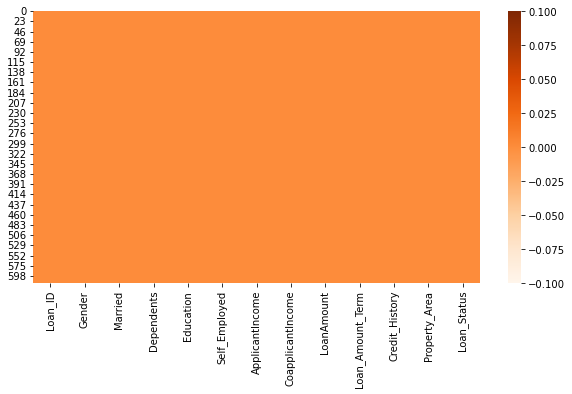

In [15]:
#checking null values using the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='Oranges');

In [16]:
# greate we have deal with the null values 

## Loan_ID

In [17]:
# here loan id is like primary key for data set , we don,t have too much with this column so we are dropping it 
df=df.drop(['Loan_ID',],axis=1)

## Gender

In [18]:
# Gender-->Nominal data-->  object data---> type need to apply encoding techniques

In [19]:
df['Gender'].describe() #describing the gender coloumn 

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

In [20]:
# Total count is 614 but for gender column count is only 601 ... there is missing value 
# unique count is 2 
# we can say that male are in majority according to the data set we have 

In [21]:
df['Gender'].isnull().sum() # checking the null 

0

In [22]:
#checking unique of variable
print(df['Gender'].unique())
#counting the uniques
print(df['Gender'].value_counts())


['Male' 'Female']
Male      502
Female    112
Name: Gender, dtype: int64


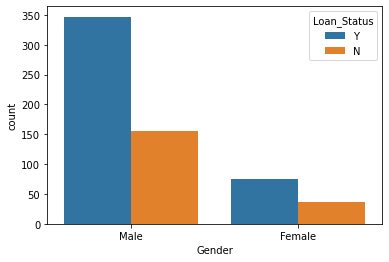

In [23]:
#count plot
sns.countplot('Gender',data=df,hue='Loan_Status');

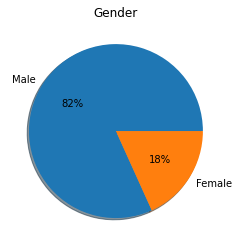

In [24]:
#pie chart
label=df['Gender'].unique()
y=df['Gender'].value_counts()

plt.title('Gender')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

In [25]:
# 82 % are male and 18% are female

In [26]:
# now we are going to apply ecoding on gender column 

In [27]:
df['Gender']=df['Gender'].replace('Female',0)
df['Gender']=df['Gender'].replace('Male',1)

## Married

In [28]:
# Married-->Nominal data-->  object data---> type need to apply encoding techniques

In [29]:
df['Married'].describe() #describing the coloumn 

count     614
unique      2
top       Yes
freq      401
Name: Married, dtype: object

In [30]:
df['Married'].isnull().sum() # checking the null 

0

In [31]:
#checking unique of variable
print(df['Married'].unique())
#counting the uniques
print(df['Married'].value_counts())

['No' 'Yes']
Yes    401
No     213
Name: Married, dtype: int64


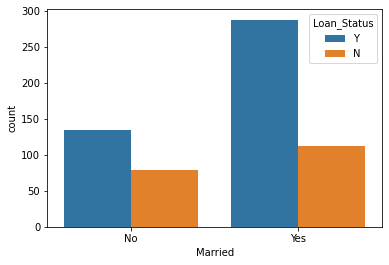

In [32]:
#count plot
sns.countplot('Married',data=df,hue='Loan_Status');

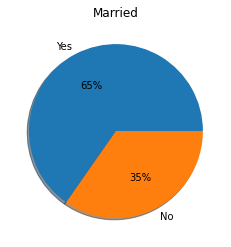

In [33]:
#pie chart

y=df['Married'].value_counts()

plt.title('Married')
plt.pie(y,labels=['Yes' ,'No'],autopct='%.0f%%',shadow=True)
plt.show()

In [34]:
# now we are going to apply ecoding on Married column 

In [35]:
df['Married']=df['Married'].replace('No',0)
df['Married']=df['Married'].replace('Yes',1)

## Dependents

In [36]:
# in this cloumn value are can be seen as numric but data type is showing obj 

In [37]:
df['Dependents'].describe() #describing the coloumn 

count     614
unique      4
top         0
freq      360
Name: Dependents, dtype: object

In [38]:
df['Dependents'].isnull().sum() # checking the null 

0

In [39]:
#checking unique of variable
print(df['Dependents'].unique())
#counting the uniques
print(df['Dependents'].value_counts())

['0' '1' '2' '3+']
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [40]:
#  ['0' '1' '2' '3+'] follwing some order so we are goingt to apply label ecoding or ordinal encoding 

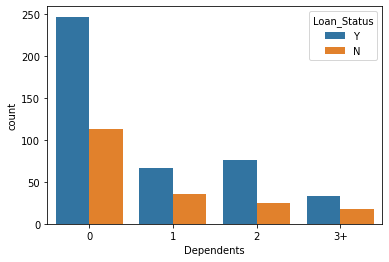

In [41]:
#count plot
sns.countplot('Dependents',data=df,hue='Loan_Status');

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
lab_enc= LabelEncoder ()

In [44]:
df["Dependents"] = lab_enc.fit_transform(df[ 'Dependents'])

## Education

In [45]:
df['Education'].describe() #describing the coloumn 

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

In [46]:
# column contain nominal data type  

In [47]:
df['Education'].isnull().sum() # checking the null 

0

In [48]:
#checking unique of variable
print(df['Education'].unique())
#counting the uniques
print(df['Education'].value_counts())

['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


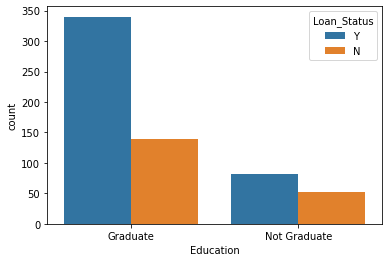

In [49]:
#count plot
sns.countplot('Education',data=df,hue='Loan_Status');

In [50]:
df["Education"] = lab_enc.fit_transform(df[ 'Education'])

## Self_Employed

In [51]:
# column contain nominal data type 

In [52]:
df['Self_Employed'].describe() #describing the coloumn 

count     614
unique      2
top        No
freq      532
Name: Self_Employed, dtype: object

In [53]:
df['Self_Employed'].isnull().sum() # checking the null 

0

In [54]:
#checking unique of variable
print(df['Self_Employed'].unique())
#counting the uniques
print(df['Self_Employed'].value_counts())

['No' 'Yes']
No     532
Yes     82
Name: Self_Employed, dtype: int64


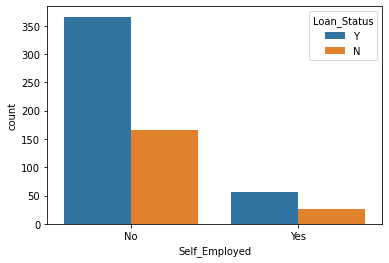

In [55]:
#count plot
sns.countplot('Self_Employed',data=df,hue='Loan_Status');

In [56]:
df['Self_Employed']=df['Self_Employed'].replace('No',0)
df['Self_Employed']=df['Self_Employed'].replace('Yes',1)

## ApplicantIncome

In [57]:
df['ApplicantIncome'].describe() #describing the coloumn 

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [58]:
df['ApplicantIncome'].isnull().sum()

0

In [59]:
df['ApplicantIncome'].skew()

6.539513113994625

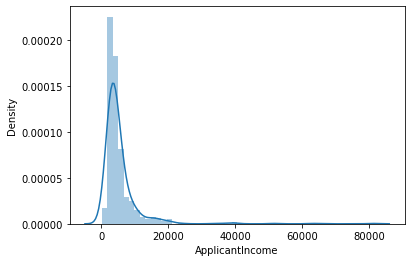

In [60]:
plt.plot()
sns.distplot(df['ApplicantIncome']) #distrubution plot to check the skewness 
plt.show()

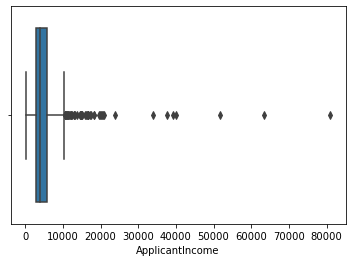

In [61]:
plt.plot()
sns.boxplot(df['ApplicantIncome'])
plt.show()

In [62]:
#Note skewed values lies between  0.5 to 1 range,  so data is moderately skewed and right skewed (but it's fine to train the model with it )  
# data is highly right skewed, to remove the skweness we are goint to use log transformation  
# and there are some outlires present 

In [63]:
logt=np.log(df["ApplicantIncome"])

In [64]:
df1 = df.copy()

In [65]:
df["ApplicantIncome"]=logt

In [66]:
print("skewness after applying log transaformnation on orignal data ", logt.skew())

skewness after applying log transaformnation on orignal data  0.4795799780016222


## CoapplicantIncome

In [67]:
df['CoapplicantIncome'].describe() #describing the coloumn 

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [68]:
df['CoapplicantIncome'].isnull().sum()

0

In [69]:
df['CoapplicantIncome'].skew()

7.491531216657306

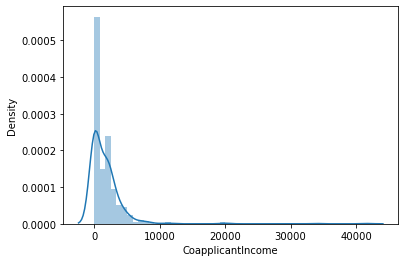

In [70]:
plt.plot()
sns.distplot(df['CoapplicantIncome']) #distrubution plot to check the skewness 
plt.show()

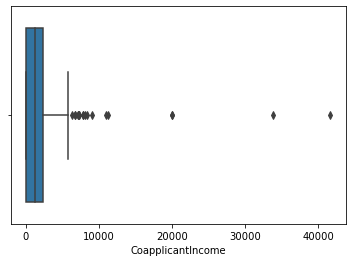

In [71]:
plt.plot()
sns.boxplot(df['CoapplicantIncome'])
plt.show()

In [72]:
# data is highly right skewed, to remove the skweness we are goint to use power transformation  
# and there are some outlires present 

In [73]:
from sklearn.preprocessing import power_transform,PowerTransformer

In [74]:
x=power_transform(df[["CoapplicantIncome"]], method='yeo-johnson')

In [75]:
df["CoapplicantIncome"]=x

In [76]:
print("skewness after applying power transaformnation on orignal data ", df["CoapplicantIncome"].skew())

skewness after applying power transaformnation on orignal data  -0.14564645710551902


## LoanAmount

In [77]:
df['LoanAmount'].describe() #describing the coloumn

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [78]:
df['LoanAmount'].isnull().sum() # cheaking the null 

0

In [79]:
df['LoanAmount'].skew()

2.726601144105299

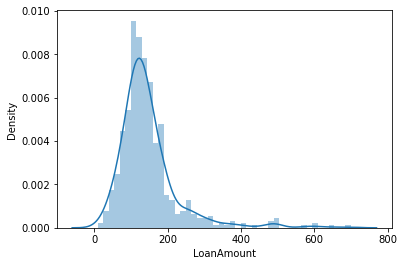

In [80]:
plt.plot()
sns.distplot(df['LoanAmount']) #distrubution plot to check the skewness 
plt.show()

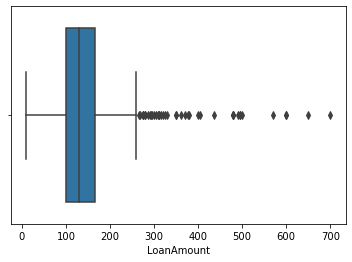

In [81]:
plt.plot()
sns.boxplot(df['LoanAmount'])
plt.show()

In [82]:
# data is a little bit right-skewed so we are goint to apply sqrt transformation 
# With some skewness 

In [83]:
LA_sqrt =np.sqrt(df["LoanAmount"])

In [84]:
df["LoanAmount"]=LA_sqrt

In [85]:
print("skewness after applying power transaformnation on orignal data ", df["LoanAmount"].skew())

skewness after applying power transaformnation on orignal data  1.3141619498030808


## Loan_Amount_Term

In [86]:
df['Loan_Amount_Term'].describe() #describing the coloumn

count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [87]:
df['Loan_Amount_Term'].isnull().sum() # cheaking the null

0

In [88]:
df['Loan_Amount_Term'].skew() # invalid opration for this column 

-2.3896799467122745

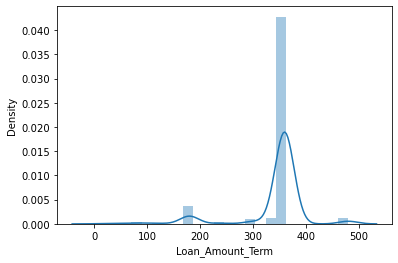

In [89]:
plt.plot()
sns.distplot(df['Loan_Amount_Term']) #distrubution plot to check the skewness 
plt.show()

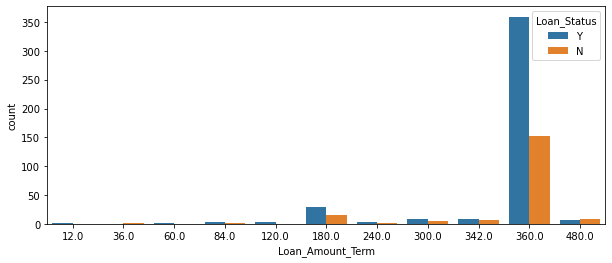

In [90]:
#count plot
plt.figure(figsize=(10,4))
sns.countplot('Loan_Amount_Term',data=df,hue='Loan_Status');

In [91]:
#checking unique of variable
print(df['Loan_Amount_Term'].unique())
#counting the uniques
print(df['Loan_Amount_Term'].value_counts())

[360. 120. 240. 342. 180.  60. 300. 480.  36.  84.  12.]
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [92]:
# data is left skew for this column  
# Loan_Amount_Term present in month  and following the order so  it is ordinal  data 
# Maximum people are preferring Loan_Amount_Term for the 360 month 
# Where high rejection  for Loan_Amount_Term 480 month  

In [93]:
df["Loan_Amount_Term"] = lab_enc.fit_transform(df[ 'Loan_Amount_Term'])

## Credit_History

In [94]:
df['Credit_History'].describe() #describing the column

count    614.000000
mean       0.855049
std        0.352339
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [95]:
df['Credit_History'].isnull().sum()

0

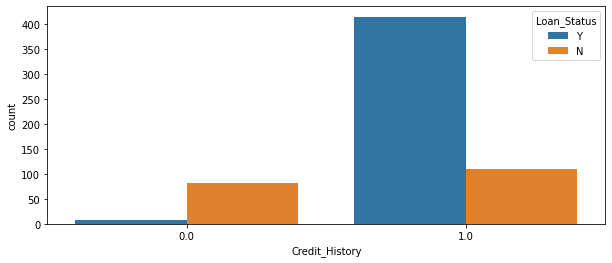

In [96]:
#count plot
plt.figure(figsize=(10,4))
sns.countplot('Credit_History',data=df,hue='Loan_Status');

In [97]:
#checking unique of variable
print(df['Credit_History'].unique())
#counting the uniques
print(df['Credit_History'].value_counts())

[1. 0.]
1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [98]:
# Credit History is strong correlation with target variable 
# those who has credit score 1 has higher chance to approve loan status

## Property_Area

In [99]:
df['Property_Area'].describe() #describing the column

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object

In [100]:
df['Property_Area'].isnull().sum()

0

In [101]:
#checking unique of variable
print(df['Property_Area'].unique())
#counting the uniques
print(df['Property_Area'].value_counts())

['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


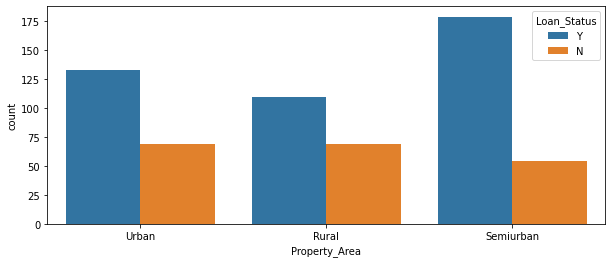

In [102]:
#count plot
plt.figure(figsize=(10,4))
sns.countplot('Property_Area',data=df,hue='Loan_Status');

In [103]:
df["Property_Area"] = lab_enc.fit_transform(df[ 'Property_Area'])

## Loan_Status

In [104]:
## target variable 
# need to convert into numrical  

In [105]:
#checking unique of variable
print(df['Loan_Status'].unique())
#counting the uniques
print(df['Loan_Status'].value_counts())

['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64


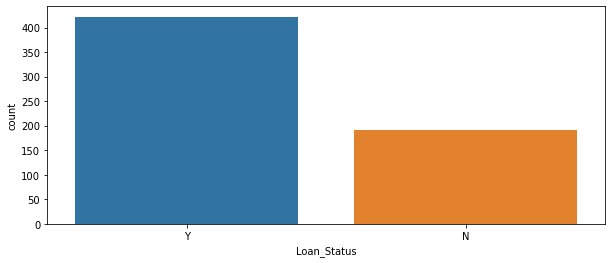

In [106]:
#count plot
plt.figure(figsize=(10,4))
sns.countplot('Loan_Status',data=df);

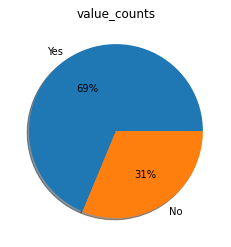

In [107]:
y=df['Loan_Status'].value_counts()
plt.title('value_counts')
plt.pie(y,labels=['Yes' ,'No'],autopct='%.0f%%',shadow=True)
plt.show()

In [108]:
# 70 and 30 percent we are going to make statment that ou data set is imbalnced 

In [109]:
df['Loan_Status']=df['Loan_Status'].replace('N',0)
df['Loan_Status']=df['Loan_Status'].replace('Y',1)

In [110]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome   -0.145646
LoanAmount           1.314162
Loan_Amount_Term    -2.907201
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [111]:
f = df.drop (columns = ['Loan_Status'])
l = df['Loan_Status']

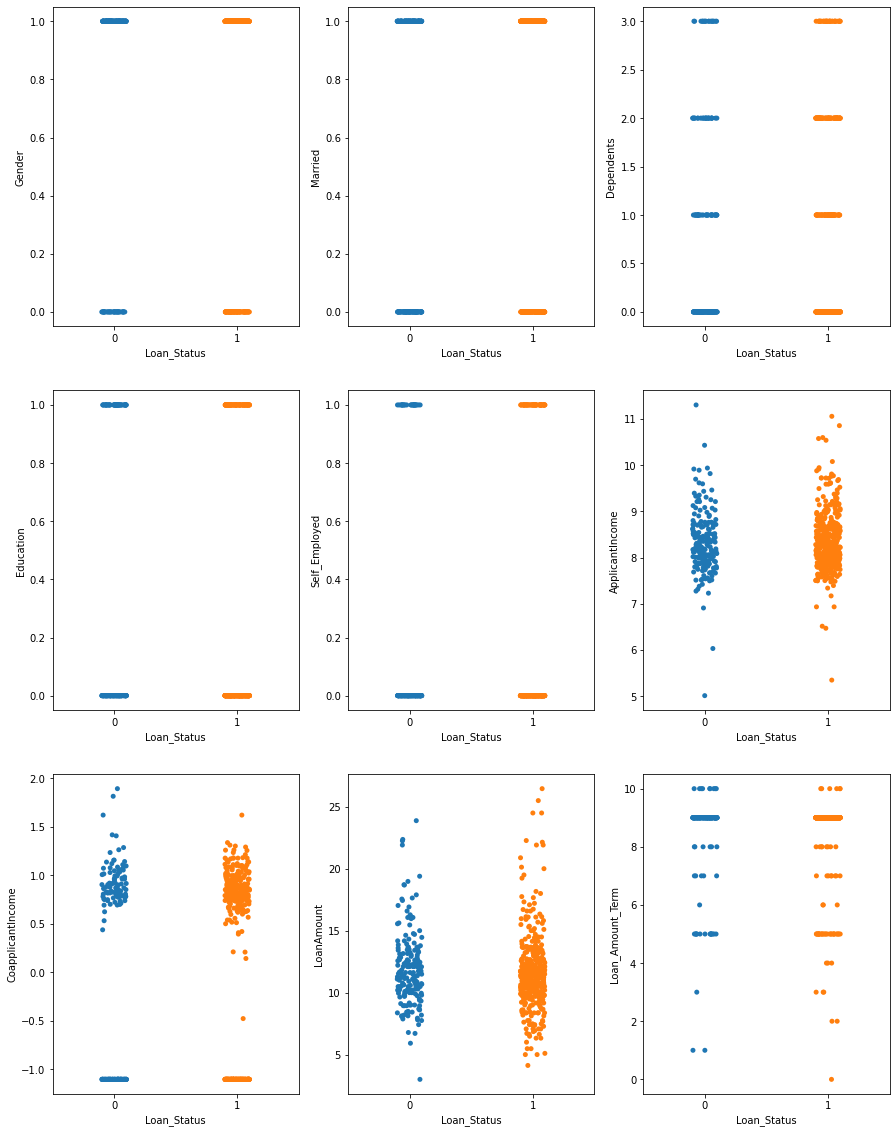

In [112]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in f:
    if plotnumber<=9 :
        ax = plt.subplot (3,3,plotnumber)
        sns.stripplot(l,f[column])
    plotnumber+=1
plt.show()

In [113]:
# we are not able to make any statement for above graph

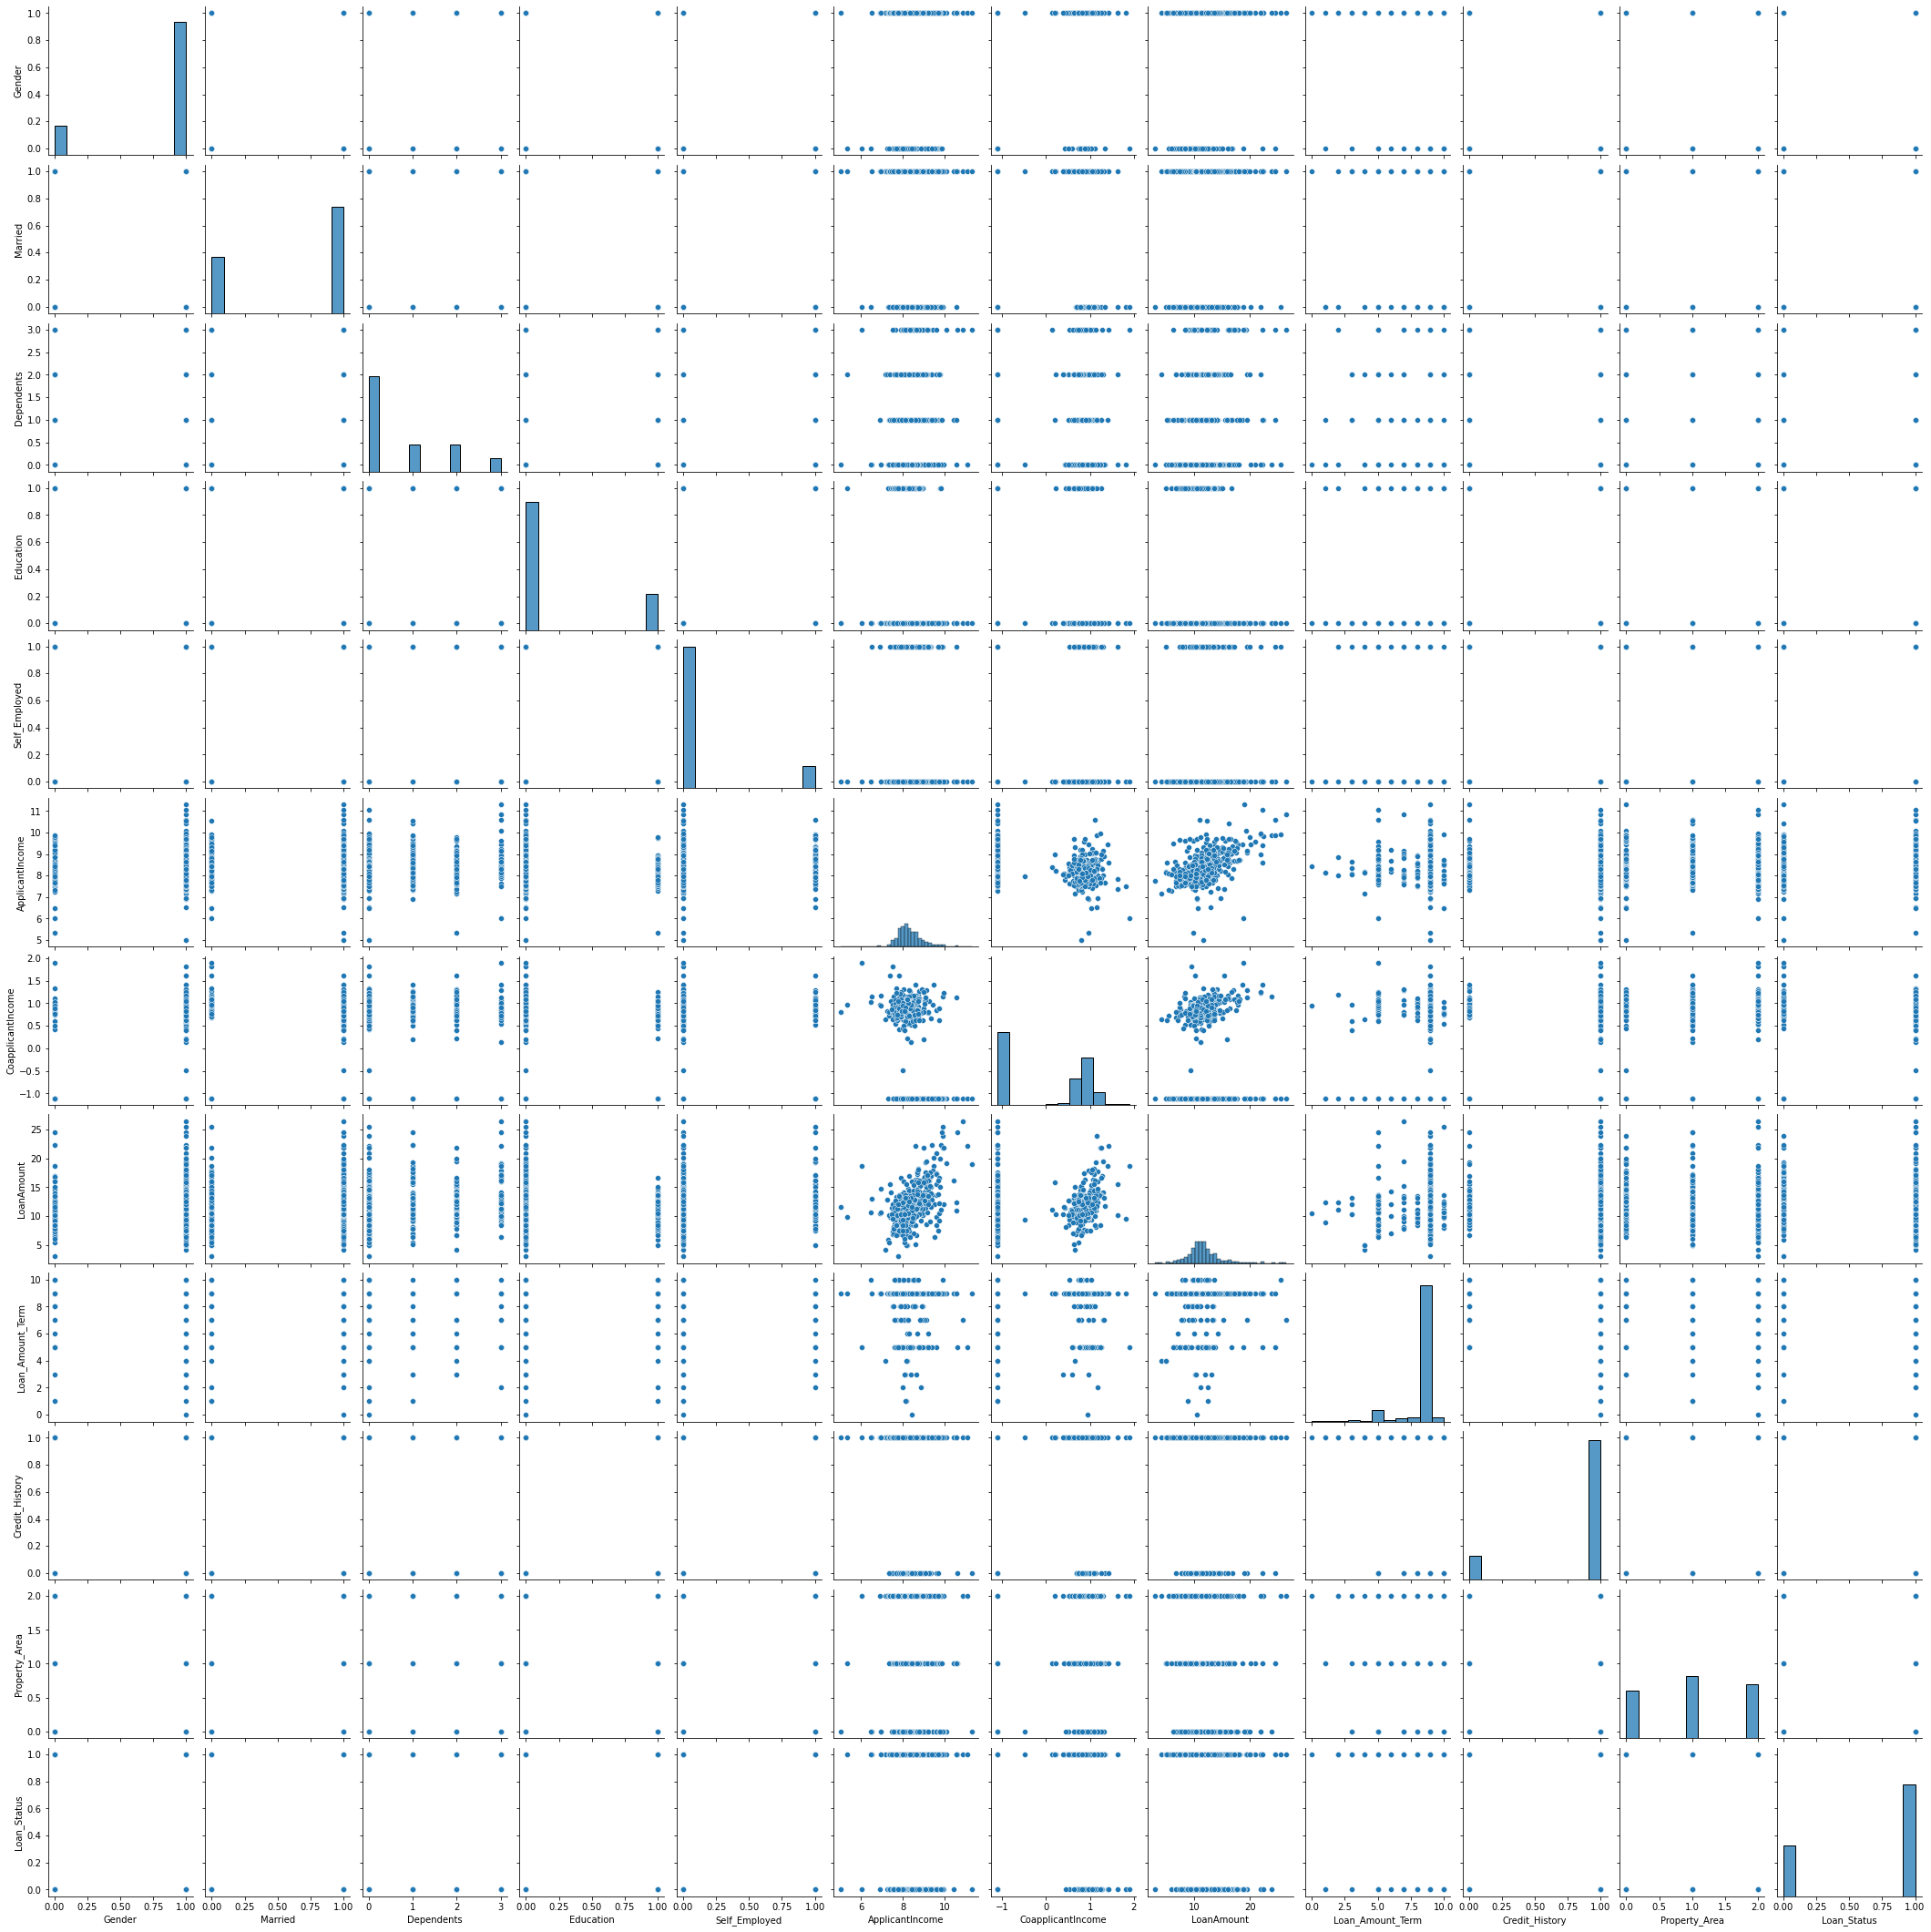

In [114]:
#pair plot
sns.pairplot(df);

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scalar = StandardScaler()
f_scaled = scalar.fit_transform (f)

In [118]:
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (f_scaled, i) for i in range (f_scaled.shape[1])]
vif["Features"] = f. columns
#Let's check the values
vif

,vif,Features
0,1.206454,Gender
1,1.388767,Married
2,1.180442,Dependents
3,1.072773,Education
4,1.042282,Self_Employed
5,1.986798,ApplicantIncome
6,1.552945,CoapplicantIncome
7,1.704011,LoanAmount
8,1.043323,Loan_Amount_Term
9,1.008514,Credit_History


In [119]:
#Conclusion : All the VIF values are less than 5 and are very low. That means there is no multicollinearity problem exist. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.
#Note,
#1) std value for vif is 5
#2) if vif value is > 5 then there possibilities multicollinearity problem
#3) std value for vif can be different by project / it depend on data set or project

<AxesSubplot:>

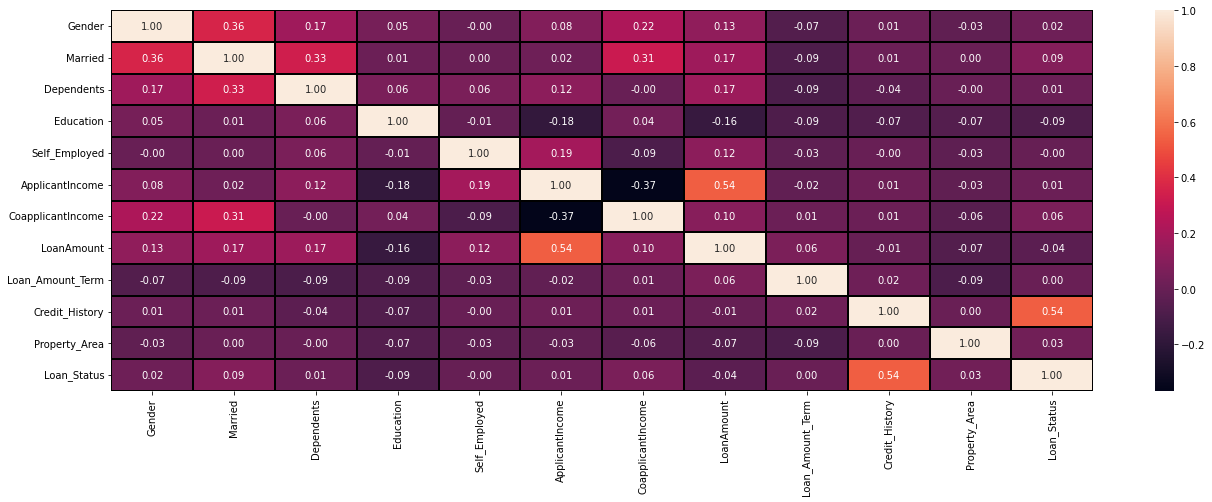

In [120]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [121]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
LoanAmount          -0.041984
Self_Employed       -0.003700
Loan_Amount_Term     0.002512
Dependents           0.010118
ApplicantIncome      0.010977
Gender               0.017987
Property_Area        0.032112
CoapplicantIncome    0.056869
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [122]:
f.corrwith(l)

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome      0.010977
CoapplicantIncome    0.056869
LoanAmount          -0.041984
Loan_Amount_Term     0.002512
Credit_History       0.540556
Property_Area        0.032112
dtype: float64

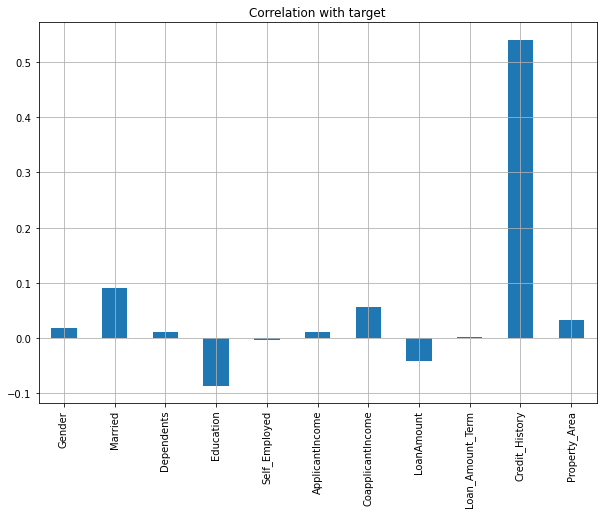

In [123]:
f.corrwith(l).plot(kind='bar',grid=True,figsize=(10,7), # Correlation with lable by graphical representation
title='Correlation with target')
plt.show()

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings ('ignore')

In [125]:
x_train,x_test,y_train,y_test= train_test_split(f_scaled, l, test_size= 0.35, random_state = 355)

In [126]:
log_reg = LogisticRegression ()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [127]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [128]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8186046511627907

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

In [129]:
# Write one function and call as many as times to check accuracy_score of different models
def metric_score (clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict (x_train)
        print("\n================Train Result=====")
        print (f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
    elif train==False:
        pred = clf.predict(x_test)
        print("\n=================Test Result================")
        print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2)) ## Model confidence/accuracy

In [131]:
from sklearn.metrics import classification_report

In [132]:
# Call the function and pass dataset to check train and test score
metric_score(log_reg,x_train,x_test, y_train, y_test, train=True) # This is for training socre

# This is for testing score
metric_score(log_reg,x_train,x_test,y_train,y_test,train=False)


================Train Result=====
Accuracy Score: 80.45%

=================Test Result================
Accuracy Score: 81.86%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.36      0.52        58
           1       0.81      0.99      0.89       157

    accuracy                           0.82       215
   macro avg       0.86      0.67      0.70       215
weighted avg       0.84      0.82      0.79       215



In [751]:
# ROC Curve
fpr, tpr, thresholds = roc_curve (y_test, y_pred)

In [752]:
# thresholds [0] means no instances predicted (It should be read from 0-max)
print ('Threshold =', thresholds)
print ('True Positive rate = ',tpr)
print ('False Positive rate = ',fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.98726115 1.        ]
False Positive rate =  [0.         0.63793103 1.        ]


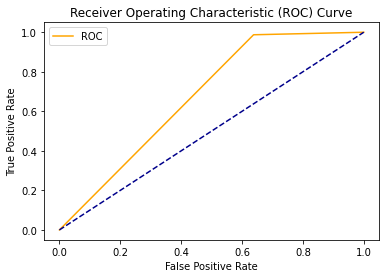

In [753]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [754]:
# How much area it is covering (AUC)
auc_score = roc_auc_score (y_test,y_pred)
print (auc_score)

0.6746650560070283


In [137]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#classification model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [138]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()


In [139]:
model_list=[lg,gnb,dtc,knc,svc,rfc,gbc,abc]

In [140]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Oranges',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()


In [777]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8651162790697674 Maximum Random Number:- 8


accuracy_score:- 0.8651162790697674
              precision    recall  f1-score   support

           0       0.53      0.97      0.69        33
           1       0.99      0.85      0.91       182

    accuracy                           0.87       215
   macro avg       0.76      0.91      0.80       215
weighted avg       0.92      0.87      0.88       215



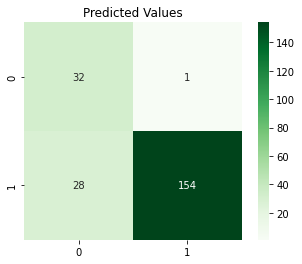

In [778]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=8)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

## GaussianNB

In [781]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()


In [782]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)


Accuracy score:- 0.8651162790697674 Maximum Random Number:- 8


accuracy_score:- 0.8651162790697674
              precision    recall  f1-score   support

           0       0.53      0.97      0.69        33
           1       0.99      0.85      0.91       182

    accuracy                           0.87       215
   macro avg       0.76      0.91      0.80       215
weighted avg       0.92      0.87      0.88       215



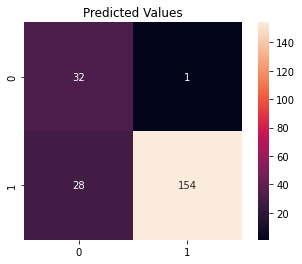

In [783]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=8)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()


## DecisionTreeClassifier

In [784]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [790]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.772093023255814 Maximum Random Number:- 11


accuracy_score:- 0.7953488372093023
              precision    recall  f1-score   support

           0       0.62      0.70      0.66        61
           1       0.88      0.83      0.85       154

    accuracy                           0.80       215
   macro avg       0.75      0.77      0.76       215
weighted avg       0.80      0.80      0.80       215



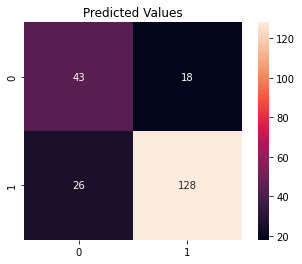

In [791]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=11)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

## KNeighborsClassifier

In [796]:

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Reds',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()


In [798]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8861788617886179 Maximum Random Number:- 8


accuracy_score:- 0.7804878048780488
              precision    recall  f1-score   support

           0       0.46      0.71      0.56        24
           1       0.92      0.80      0.85        99

    accuracy                           0.78       123
   macro avg       0.69      0.75      0.71       123
weighted avg       0.83      0.78      0.80       123



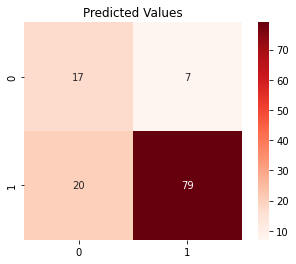

In [800]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=17)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

## Support Vector Classifier

In [801]:

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='crest',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()


In [803]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)


Accuracy score:- 0.8861788617886179 Maximum Random Number:- 8


accuracy_score:- 0.8211382113821138
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        11
           1       1.00      0.80      0.89       112

    accuracy                           0.82       123
   macro avg       0.67      0.90      0.70       123
weighted avg       0.94      0.82      0.86       123



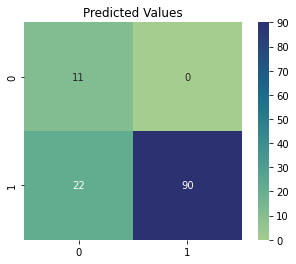

In [805]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=35)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()


## RandomForestClassifier

In [806]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='viridis',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()


In [808]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)


Accuracy score:- 0.8780487804878049 Maximum Random Number:- 8


accuracy_score:- 0.8211382113821138
              precision    recall  f1-score   support

           0       0.51      0.83      0.63        23
           1       0.95      0.82      0.88       100

    accuracy                           0.82       123
   macro avg       0.73      0.82      0.76       123
weighted avg       0.87      0.82      0.84       123



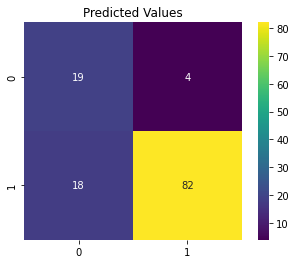

In [810]:

x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=17)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()


## GradientBoostingClassifier

In [133]:

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='pink',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()


In [146]:

maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.20,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)


Accuracy score:- 0.8943089430894309 Maximum Random Number:- 8


accuracy_score:- 0.8325581395348837
              precision    recall  f1-score   support

           0       0.57      0.77      0.65        44
           1       0.94      0.85      0.89       171

    accuracy                           0.83       215
   macro avg       0.75      0.81      0.77       215
weighted avg       0.86      0.83      0.84       215



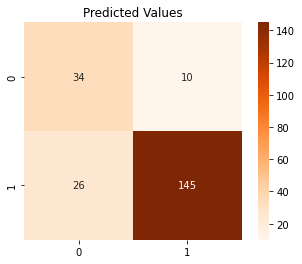

In [147]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.35,random_state=8)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()


## AdaBoostClassifier

In [148]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='icefire',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()


In [153]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8432432432432433 Maximum Random Number:- 13


accuracy_score:- 0.8432432432432433
              precision    recall  f1-score   support

           0       0.52      0.77      0.62        31
           1       0.95      0.86      0.90       154

    accuracy                           0.84       185
   macro avg       0.74      0.82      0.76       185
weighted avg       0.88      0.84      0.85       185



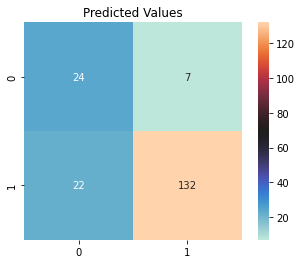

In [156]:
x_train,x_test,y_train,y_test=train_test_split(f_scaled,l,test_size=.30,random_state=13)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()


In [157]:
for model in model_list:
    score=cross_val_score(model,f_scaled,l,cv=10)
    print(model)
    print(score)
    print(score.mean())


LogisticRegression()
[0.80645161 0.82258065 0.75806452 0.75806452 0.78688525 0.78688525
 0.86885246 0.85245902 0.80327869 0.83606557]
0.8079587519830775
GaussianNB()
[0.79032258 0.82258065 0.74193548 0.75806452 0.78688525 0.78688525
 0.86885246 0.83606557 0.80327869 0.83606557]
0.8030936012691697
DecisionTreeClassifier()
[0.70967742 0.66129032 0.67741935 0.74193548 0.73770492 0.75409836
 0.81967213 0.62295082 0.78688525 0.60655738]
0.7118191433104177
KNeighborsClassifier()
[0.77419355 0.82258065 0.75806452 0.74193548 0.75409836 0.72131148
 0.85245902 0.78688525 0.7704918  0.80327869]
0.7785298783712321
SVC()
[0.80645161 0.82258065 0.77419355 0.75806452 0.78688525 0.78688525
 0.85245902 0.85245902 0.80327869 0.83606557]
0.8079323109465891
RandomForestClassifier()
[0.77419355 0.77419355 0.75806452 0.74193548 0.78688525 0.78688525
 0.86885246 0.73770492 0.75409836 0.81967213]
0.7802485457429931
GradientBoostingClassifier()
[0.77419355 0.80645161 0.69354839 0.72580645 0.73770492 0.78688525

In [ ]:
## Save the model
import joblib

In [ ]:
# without hyperparameter tunning we are saving the model 